# Dataset Overview
This dataset contains observations detailing the results of professional boxing bouts. The data was originally scraped from BoxRec.com and contains key features such as demographic/physical characteristics of each boxer, boxer's professional record, and data particular to this bout such as scores from judges and the end result.

The dataset was found on Kaggle and can be accessed below:
https://www.kaggle.com/slonsky/boxing-bouts

Dataset contains approximately 387k observations across 26 columns (features).

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read Data In, Get a Feel for Characteristics

In [14]:
boxing = pd.read_csv('boxing.csv')

In [15]:
boxing.shape

(387427, 26)

In [16]:
boxing.columns

Index(['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B',
       'stance_A', 'stance_B', 'weight_A', 'weight_B', 'won_A', 'won_B',
       'lost_A', 'lost_B', 'drawn_A', 'drawn_B', 'kos_A', 'kos_B', 'result',
       'decision', 'judge1_A', 'judge1_B', 'judge2_A', 'judge2_B', 'judge3_A',
       'judge3_B'],
      dtype='object')

In [17]:
boxing.dtypes

age_A       float64
age_B       float64
height_A    float64
height_B    float64
reach_A     float64
reach_B     float64
stance_A     object
stance_B     object
weight_A    float64
weight_B    float64
won_A         int64
won_B         int64
lost_A        int64
lost_B        int64
drawn_A       int64
drawn_B       int64
kos_A         int64
kos_B       float64
result       object
decision     object
judge1_A    float64
judge1_B    float64
judge2_A    float64
judge2_B    float64
judge3_A    float64
judge3_B    float64
dtype: object

# Exploratory Analysis

In [18]:
boxing.head(10)

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0
5,24.0,31.0,175.0,175.0,179.0,178.0,orthodox,orthodox,NaN,NaN,...,31,28.0,win_A,KO,NaN,NaN,NaN,NaN,NaN,NaN
6,23.0,31.0,175.0,175.0,179.0,188.0,orthodox,orthodox,155.0,155.0,...,31,12.0,win_A,SD,115.0,113.0,117.0,111.0,113.0,115.0
7,23.0,31.0,175.0,177.0,179.0,175.0,orthodox,orthodox,155.0,NaN,...,30,18.0,win_A,TKO,89.0,82.0,88.0,83.0,89.0,82.0
8,36.0,23.0,173.0,175.0,183.0,179.0,orthodox,orthodox,152.0,NaN,...,26,30.0,win_A,MD,116.0,112.0,114.0,114.0,117.0,111.0
9,27.0,22.0,177.0,175.0,183.0,179.0,southpaw,southpaw,NaN,NaN,...,14,30.0,win_B,UD,112.0,115.0,109.0,118.0,111.0,116.0


In [19]:
boxing.describe()

,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B,won_A,won_B,...,drawn_A,drawn_B,kos_A,kos_B,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
count,352888.000000,257935.000000,249246.000000,134640.000000,112342.000000,37873.000000,135573.000000,130358.000000,387427.000000,387427.000000,...,387427.000000,387427.000000,387427.000000,387348.000000,52248.000000,52060.000000,70371.000000,70032.000000,61231.000000,61023.000000
mean,24.416041,26.583345,172.786657,172.882657,178.848605,179.001030,146.340636,147.089484,23.108438,15.159080,...,2.826481,2.636375,10.338887,6.234735,62.778901,59.509700,59.560941,56.570411,60.784276,57.995215
std,6.523590,11.823224,9.130127,9.430631,12.002404,14.867537,30.240142,30.624890,27.629901,19.938137,...,5.584610,5.027003,12.392049,8.750690,30.337580,29.285058,31.021367,30.260935,31.910461,31.170590
min,-74.000000,-74.000000,2.000000,15.000000,5.000000,1.000000,10.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,23.000000,166.000000,167.000000,170.000000,171.000000,125.000000,126.000000,5.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,39.000000,37.000000,39.000000,36.000000,39.000000,36.000000
50%,24.000000,26.000000,173.000000,173.000000,178.000000,178.000000,140.000000,140.000000,14.000000,8.000000,...,1.000000,1.000000,6.000000,3.000000,59.000000,54.000000,58.000000,54.000000,58.000000,54.000000
75%,27.000000,30.000000,178.000000,179.000000,185.000000,185.000000,160.000000,160.000000,31.000000,21.000000,...,3.000000,3.000000,14.000000,9.000000,80.000000,79.000000,80.000000,75.000000,80.000000,78.000000
max,1818.000000,2016.000000,255.000000,255.000000,456.000000,456.000000,363.000000,450.000000,332.000000,251.000000,...,77.000000,76.000000,131.000000,128.000000,540.000000,291.000000,299.000000,294.000000,300.000000,295.000000


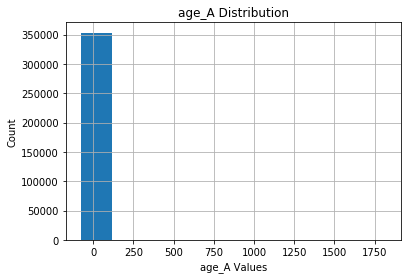

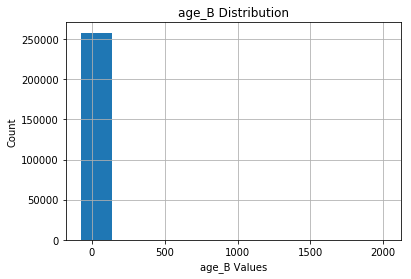

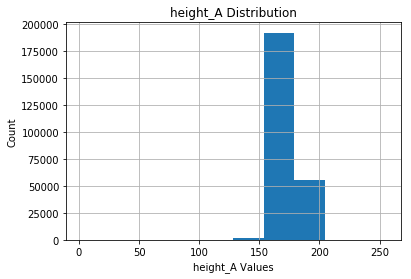

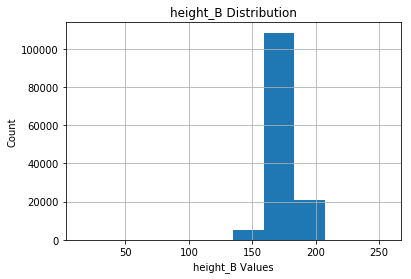

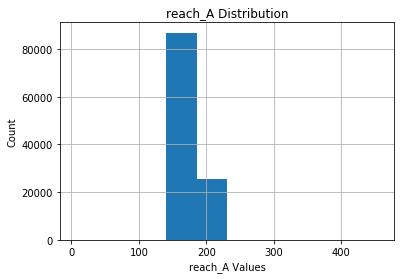

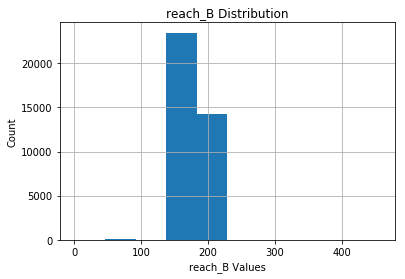

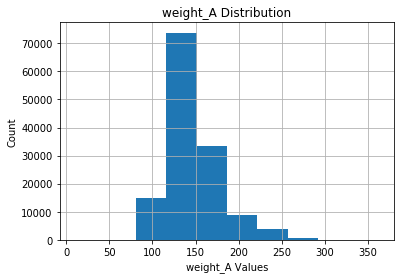

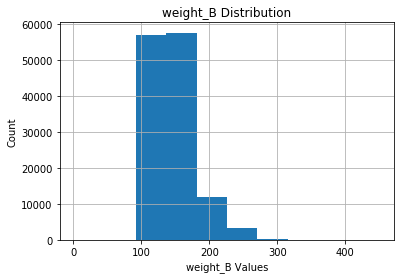

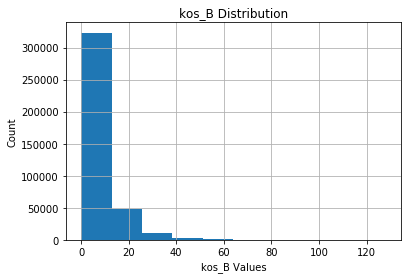

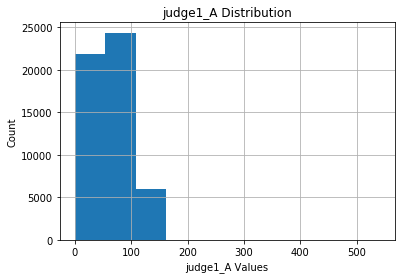

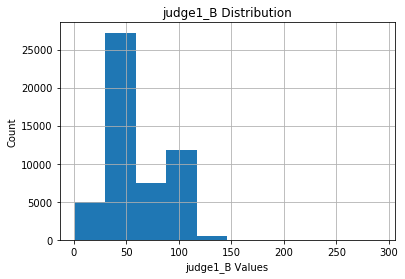

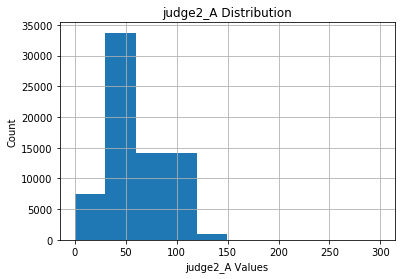

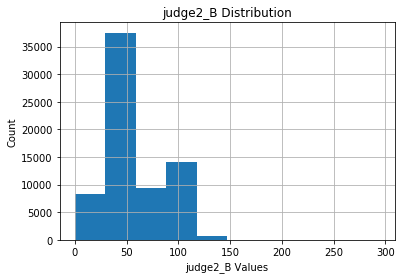

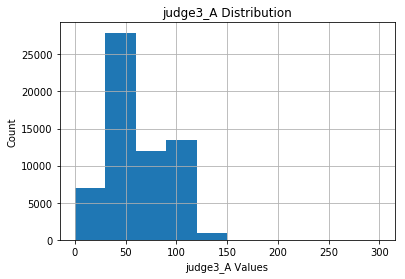

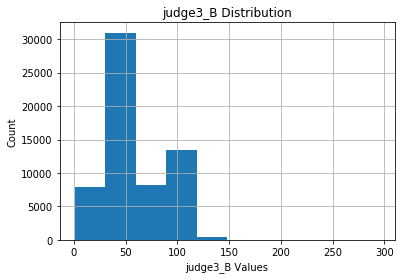

In [20]:
# Plot histograms for all continuous data
for col in boxing.dtypes[boxing.dtypes == 'float64'].index:
    boxing[col].hist()
    plt.title(col + " Distribution")
    plt.xlabel(col + " Values")
    plt.ylabel("Count")
    plt.show()

# Data Cleaning

In [21]:
#Determine missing values across dataframe

missing_values_count = boxing.isnull().sum()
print(missing_values_count)

age_A        34539
age_B       129492
height_A    138181
height_B    252787
reach_A     275085
reach_B     349554
stance_A    156418
stance_B    156418
weight_A    251854
weight_B    257069
won_A            0
won_B            0
lost_A           0
lost_B           0
drawn_A          0
drawn_B          0
kos_A            0
kos_B           79
result           0
decision         0
judge1_A    335179
judge1_B    335367
judge2_A    317056
judge2_B    317395
judge3_A    326196
judge3_B    326404
dtype: int64


In [22]:
#Drop NaNs
boxing = boxing.dropna()

In [23]:
#Final input shape
boxing.shape

(2853, 26)

# Instantiate and Run MLP Classifier Model

In [24]:
#Take sample of boxing DataFrame for modeling purposes (computational complexity)
boxing = boxing.sample(1000)

#Establish X and Y
X = boxing.drop(['stance_A', 'stance_B', 'result', 'decision'], 1)

# Create dummies separately. Don't create for 'result' as this will be our Y.
stance_A = pd.get_dummies(boxing.stance_A)
stance_B = pd.get_dummies(boxing.stance_B)
decision = pd.get_dummies(boxing.decision)

#Concat with other variables
X = pd.concat([X, stance_A, stance_B, decision], axis=1)

#Establish Y
Y = boxing.result

# Predicting the result of the bout

In [38]:
Y.value_counts()/len(Y)

win_A    0.815
win_B    0.143
draw     0.042
Name: result, dtype: float64

**First, run MLP with 3 layers

In [30]:
# Establish and fit the model, with 3 layers

import timeit
start = timeit.default_timer()

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100))
mlp.fit(X, Y)

#Scoring
print('Percentage accuracy for 3 layered MLP:')
print(mlp.score(X, Y))

#Evaluate
print('Cross-Validation Score:')
print(cross_val_score(mlp, X, Y, cv=5))

#Print time
stop = timeit.default_timer()
execution_time = stop - start
print('Program Executed in {}'.format(round(execution_time, 2)))

Percentage accuracy for 3 layered MLP:
0.831
Cross-Validation Score:
[0.80597015 0.81094527 0.88       0.81909548 0.81909548]
Program Executed in 1.56


**Second, run MLP with 5 layers and different activation function ('logistic)

In [31]:
# Establish and fit the model, with 5 layers and logistic activation function

import timeit
start = timeit.default_timer()

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100), activation='logistic')
mlp.fit(X, Y)

#Scoring
print('Percentage accuracy for 5 layered MLP and Logistic Activiation Function:')
print(mlp.score(X, Y))

#Evaluate
print('Cross-Validation Score:')
print(cross_val_score(mlp, X, Y, cv=5))

#Print time
stop = timeit.default_timer()
execution_time = stop - start
print('Program Executed in {}'.format(round(execution_time, 2)))

Percentage accuracy for 5 layered MLP and Logistic Activiation Function:
0.815
Cross-Validation Score:
[0.81094527 0.81094527 0.815      0.81909548 0.81909548]
Program Executed in 1.73


**Third, run MLP with 10 layers and alpha of 0.3

In [32]:
# Establish and fit the model, with 10 layers and alpha = 0.3

import timeit
start = timeit.default_timer()

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100, 100), alpha=0.3)
mlp.fit(X, Y)

#Scoring
print('Percentage accuracy for 10 layered MLP and Alpha = 0.3:')
print(mlp.score(X, Y))

#Evaluate
print('Cross-Validation Score:')
print(cross_val_score(mlp, X, Y, cv=5))

#Print time
stop = timeit.default_timer()
execution_time = stop - start
print('Program Executed in {}'.format(round(execution_time, 2)))

Percentage accuracy for 10 layered MLP and Alpha = 0.3:
0.834
Cross-Validation Score:
[0.81094527 0.81094527 0.815      0.81909548 0.81909548]
Program Executed in 7.43


**Fourth, run MLP with only 5 layers, with each being 1000 perceptrons wide. Other parameters standardized

In [37]:
# Establish and fit the model, with 5 layers (each 1000 wide)

import timeit
start = timeit.default_timer()

mlp = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000, 1000, 1000))
mlp.fit(X, Y)

#Scoring
print('Percentage accuracy for 20 layered MLP:')
print(mlp.score(X, Y))

#Evaluate
print('Cross-Validation Score:')
print(cross_val_score(mlp, X, Y, cv=5))

#Print time
stop = timeit.default_timer()
execution_time = stop - start
print('Program Executed in {}'.format(round(execution_time, 2)))

Percentage accuracy for 20 layered MLP:
0.821
Cross-Validation Score:
[0.81094527 0.81094527 0.825      0.81909548 0.81909548]
Program Executed in 142.53


# Instantiate and Run Gradient Boosting Classifier Model

In [33]:
#Establish and fit the model, standard parameters for gradient boosting classifier

import timeit
start = timeit.default_timer()

clf = ensemble.GradientBoostingClassifier()
clf.fit(X, Y)

#Scoring
print('Percentage accuracy for Gradient Boosting Classifier:')
print(clf.score(X, Y))

#Evaluate
print('Cross-Validation Score:')
print(cross_val_score(clf, X, Y, cv=5))

#Print time
stop = timeit.default_timer()
execution_time = stop - start
print('Program Executed in {}'.format(round(execution_time, 2)))

Percentage accuracy for Gradient Boosting Classifier:
0.991
Cross-Validation Score:
[0.92039801 0.88557214 0.925      0.90954774 0.92964824]
Program Executed in 2.9


# Compare the Two Models

Overall, the gradient boosting classifier provided the highest prediction accuracy, but overfitting was observed. I found that the overall best performing model was the MLP with 5 layers (each 100 perceptrons wide) and an activation function of 'logistic'. This model instantiated, ran on the training data, and conducted cross-validation in 1.73 seconds.